<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/analisiRECENSIONI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8


In [ ]:
dftestl = pd.read_feather('/content/dftestRECfea')

In [ ]:
#dftest = pd.read_feather('/content/dftrainRECfea')

In [ ]:
dftrain = pd.read_feather('/content/dftrainRECfea')

# Data analysis
 Exploratory Data Analysis(EDA)

In [ ]:
dftrain.sample(frac=1)

,testo,label polarità,label sentimento
1197,Prezzo super per avere una buona fotocamera ad...,5,1
2555,"Felpa stupenda, bellissima, ottima per l'inver...",5,1
2816,"Conforme alle attese, ed inoltre servizio Clie...",5,1
2274,Film visto al cinema e molto apprezzato.Conseg...,5,1
1328,"Gli accessori dovevano essere originali Apple,...",3,1
...,...,...,...
1478,Il prodotto é conforme alla descrizione. É arr...,5,1
309,Prodotto arrivato nei tempi previsti.Buona qua...,5,1
1459,"Di discreta qualità, ma non aspettatevi i risu...",3,1
2165,"Film bellissimo, lo consiglio anche a chi non ...",5,1


In [ ]:
dftrain.head()

,testo,label polarità,label sentimento
0,"Ottimo prodotto di marca, la qualità é veramen...",5,1
1,Ottimo rasoio dal semplice utilizzo. Rade molt...,5,1
2,Un quarto delle dimensioni dello Show original...,5,1
3,Il prodotto si presenta esattamente come in fo...,5,1
4,"Superlativa, velocità in scrittura superiore a...",5,1


In [ ]:
dftrain.rename(columns = {'label polarità':'labPol', 'label sentimento':'labSen'}, inplace = True)

In [ ]:
dftestl.rename(columns = {'sentence':'testo','score':'labPol', 'sentimento':'labSen'}, inplace = True)

In [ ]:
dftestl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   testo   1200 non-null   object
 1   labPol  1200 non-null   int64 
 2   labSen  1200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.2+ KB


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   testo   3054 non-null   object
 1   labPol  3054 non-null   int64 
 2   labSen  3054 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 71.7+ KB


In [ ]:
dftrain.info()

In [ ]:
dftrain.shape

(3054, 3)

In [ ]:
dftrain.columns

Index(['testo', 'labPol', 'labSen'], dtype='object')

In [ ]:
dftrain.rename(columns = {'label polarità':'labPol', 'label sentimento':'labSen'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


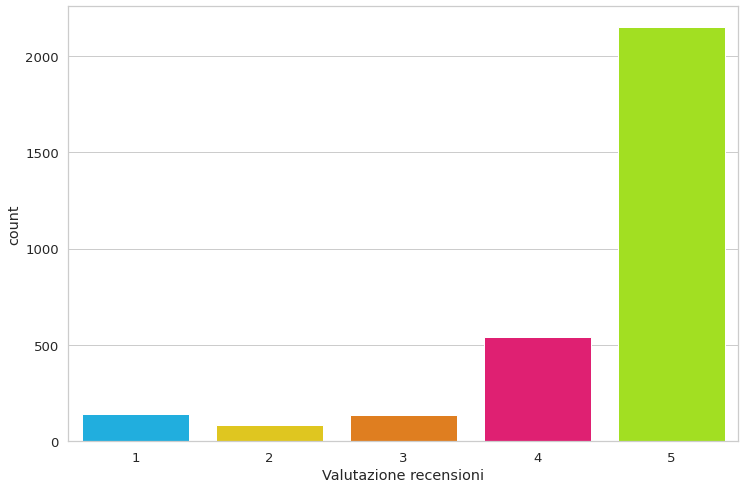

In [ ]:
sns.countplot(dftrain.labPol)
plt.xlabel('Valutazione recensioni');

In [ ]:
contatoreRec=dftrain['labPol'].value_counts()

print ("Totale recensioni analizzati: 3054")


Totale recensioni analizzati: 3054


In [ ]:
contatoreRec

5    2150
4     539
1     144
3     138
2      83
Name: labPol, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


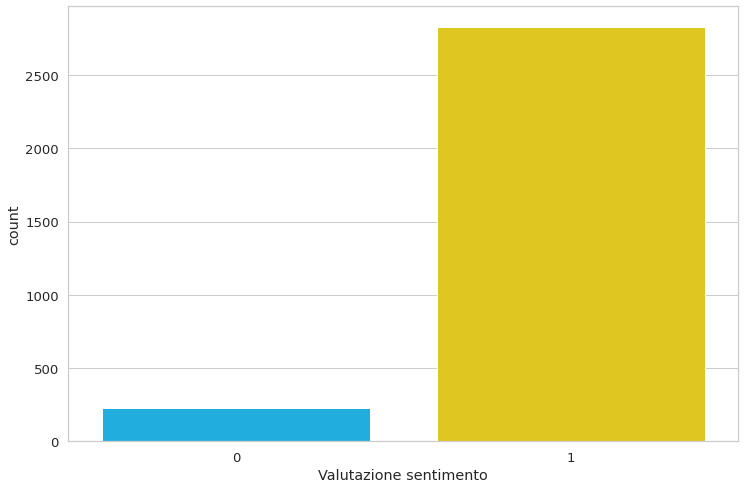

In [ ]:
sns.countplot(dftrain.labSen)
plt.xlabel('Valutazione sentimento');

In [ ]:
contatoreSen=dftrain['labSen'].value_counts()


In [ ]:
contatoreSen

1    2827
0     227
Name: labSen, dtype: int64

In [ ]:
dftrain = dftrain.rename(columns={'testo': 'text'})


In [ ]:
dftestl = dftest.rename(columns={'testo': 'text'})


In [ ]:
import numpy

numpy.random.seed(0)



In [ ]:
dftrain.columns

Index(['text', 'labPol', 'labSen'], dtype='object')

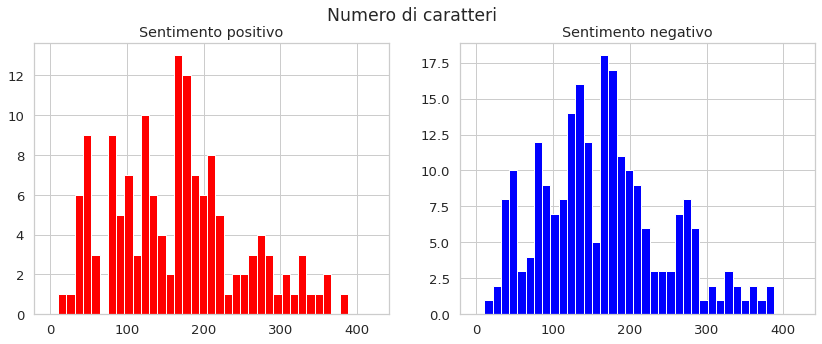

In [ ]:
#numero di caratteri in ogni messaggio

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))

bins = np.linspace(0,420, 40)

testo_len=dftrain[dftrain['labPol']==1]['text'].str.len()
ax1.hist(testo_len, bins, color='red')
ax1.set_title('Sentimento positivo')

testo_len=dftrain[dftrain['labSen']==0]['text'].str.len()
ax2.hist(testo_len, bins, color='blue')
ax2.set_title('Sentimento negativo')
fig.suptitle('Numero di caratteri')
plt.show()


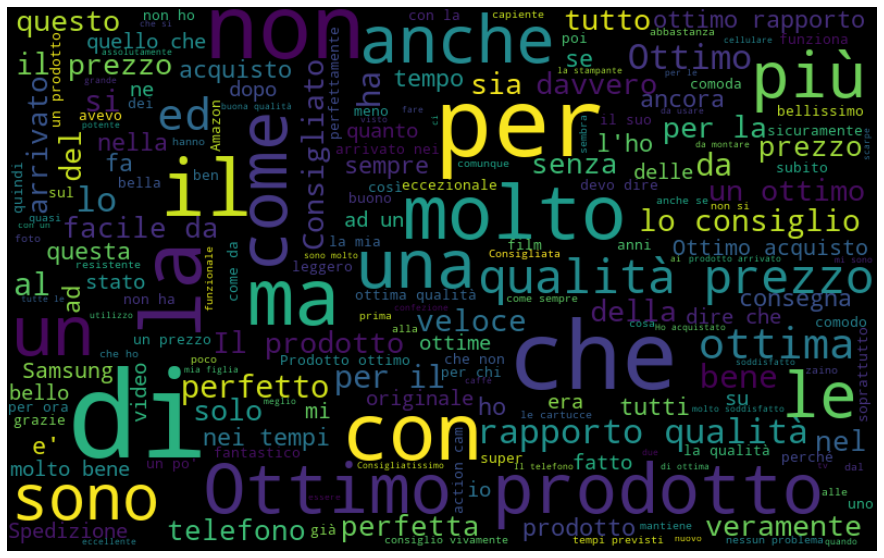

In [ ]:
#wordcloud recensioni 5 stelle

all_words = ' '.join([text for text in dftrain['text'][dftrain['labPol']==5]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

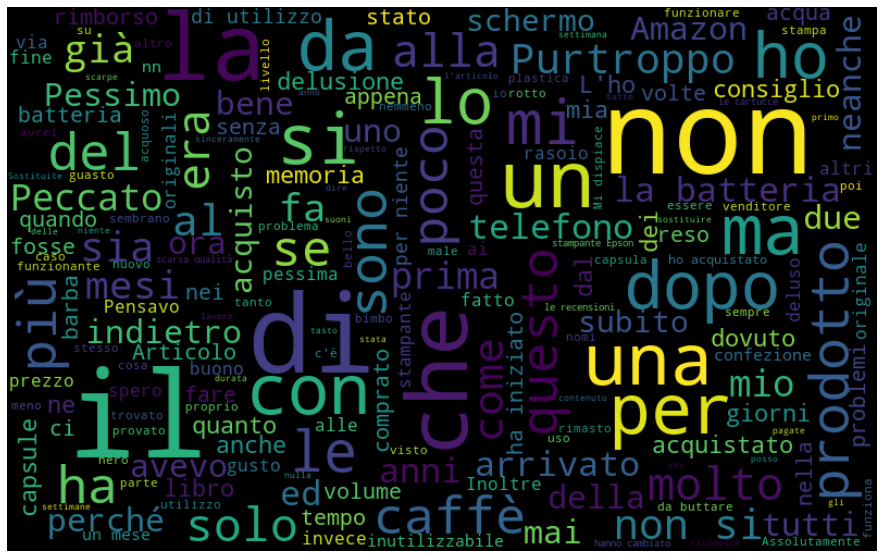

In [ ]:
#word cloud recensioni 1 stella

all_words = ' '.join([text for text in dftrain['text'][dftrain['labPol']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in dftrain[dftrain['labSen']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords
stop=set(stopwords.words('italian'))

In [ ]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]

KeyError: ignored

<BarContainer object of 20 artists>

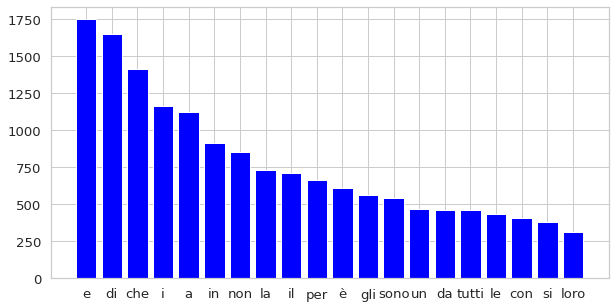

In [ ]:
#stop words tra testo senza hatespeech
fig, ax = plt.subplots(figsize=(10,5))

x,y=zip(*top)
plt.bar(x,y, color='blue')

In [ ]:
#stop words tra testo con hatespeech


corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
    

fig, ax = plt.subplots(figsize=(10,5))

x,y=zip(*top)
plt.bar(x,y, color='red')



NameError: ignored

<BarContainer object of 19 artists>

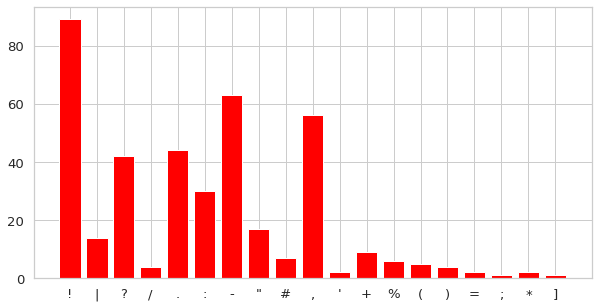

In [ ]:
#uso punteggiatura nei testi con hatespeech

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y, color='red')

<BarContainer object of 21 artists>

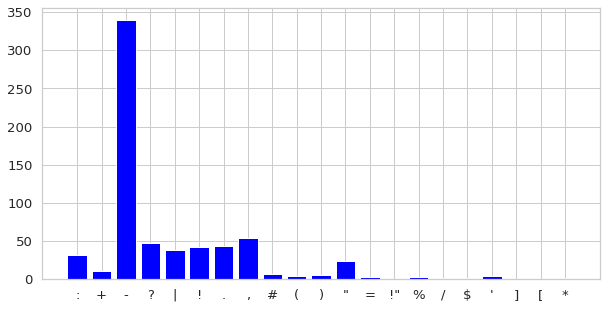

In [ ]:
#uso punteggiatura nei testi senza hatespeech


plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='blue')

Parole comuni

In [ ]:
from collections import  Counter

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:85]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

NameError: ignored

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})


sns.barplot(x=y,y=x)

NameError: ignored

In [ ]:
#Bigram

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

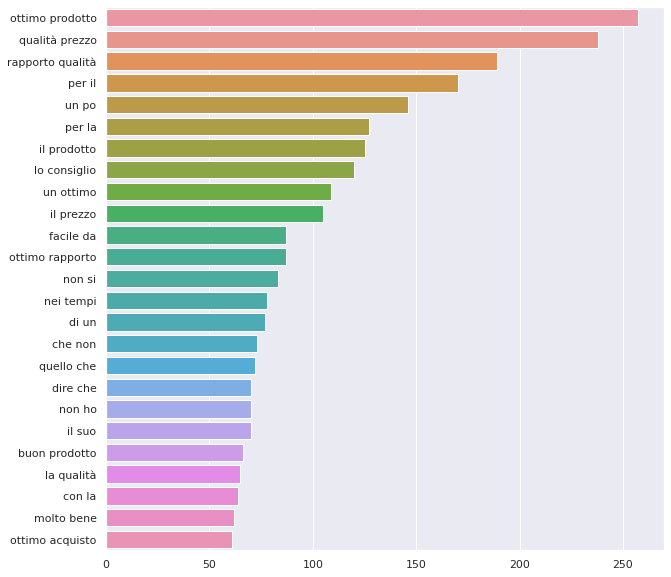

In [ ]:
plt.figure(figsize=(10,10))
top_tweet_bigrams=get_top_tweet_bigrams(dftrain['text'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
dftrain['temp_list1'] = dftrain['text'].apply(lambda x:str(x).split()) #List of words in every row for text

In [ ]:
top = Counter([item for sublist in dftrain['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,di,1686
2,è,1331
3,la,1246
4,per,1241
5,il,1236
6,che,1145
7,un,1078
8,non,1033
9,in,882
10,da,705


# Data cleaning

In [ ]:
def cleaning (testo):
    
    # elimina dal testo punteggiatura, link html, 
    testo = re.sub('\[.*?\]', '', testo)
    testo = re.sub('https?://\S+|www\.\S+', '', testo)
    testo = re.sub('<.*?>+', '', testo)
    testo = re.sub('[%s]' % re.escape(string.punctuation), '', testo)
    testo = re.sub('\n', '', testo)
    testo = re.sub('\w*\d\w*', '', testo)

    # elimina parole ricorrenti - scelta del data analysis
    testo = re.sub('@user', '', testo)
    testo = re.sub('URL', '', testo)
    testo = re.sub('user', '', testo)
    testo = re.sub('url', '', testo)


    # in minuscolo tutte le lettere
    testo = testo.lower()

    return testo

In [ ]:
dftrain['text'] = dftrain['text'].apply(lambda x: cleaning(x))
dftestl['text'] = dftestl['text'].apply(lambda x: cleaning(x))


In [ ]:
dftrain.head()

,text,labPol,labSen,temp_list1
0,ottimo prodotto di marca la qualità é verament...,5,1,"[Ottimo, prodotto, di, marca,, la, qualità, é,..."
1,ottimo rasoio dal semplice utilizzo rade molto...,5,1,"[Ottimo, rasoio, dal, semplice, utilizzo., Rad..."
2,un quarto delle dimensioni dello show original...,5,1,"[Un, quarto, delle, dimensioni, dello, Show, o..."
3,il prodotto si presenta esattamente come in fo...,5,1,"[Il, prodotto, si, presenta, esattamente, come..."
4,superlativa velocità in scrittura superiore a ...,5,1,"[Superlativa,, velocità, in, scrittura, superi..."


# Tokenization

l'input viene diviso in token/frammenti.
Esistono diverse tecniche per eseguire la tokenization:


*   Tokenization attraverso gli spazi tra le paralore/testo
*   Tokenization attraverso punteggiatura
*   Tokenization attraverso espressioni regolari o Treebank Word Tokenizer



In [ ]:
# importa  la librerei Natural Language Toolkit per python

import nltk

In [ ]:
dftrain.drop(columns=['temp_list1'])

,text,labPol,labSen
0,ottimo prodotto di marca la qualità é verament...,5,1
1,ottimo rasoio dal semplice utilizzo rade molto...,5,1
2,un quarto delle dimensioni dello show original...,5,1
3,il prodotto si presenta esattamente come in fo...,5,1
4,superlativa velocità in scrittura superiore a ...,5,1
...,...,...,...
3049,da la impressione che sia robusto ed impermeab...,2,0
3050,purtroppo non andavano bene per la mia stampante,5,1
3051,lo stiamo usando in famiglia da qualche mese i...,3,1
3052,elettrodomestico che già dallapparenza risulta...,5,1


In [ ]:
dftrain.drop(columns=['temp_list1'])
dftrain.head()

,text,labPol,labSen,temp_list1
0,ottimo prodotto di marca la qualità é verament...,5,1,"[Ottimo, prodotto, di, marca,, la, qualità, é,..."
1,ottimo rasoio dal semplice utilizzo rade molto...,5,1,"[Ottimo, rasoio, dal, semplice, utilizzo., Rad..."
2,un quarto delle dimensioni dello show original...,5,1,"[Un, quarto, delle, dimensioni, dello, Show, o..."
3,il prodotto si presenta esattamente come in fo...,5,1,"[Il, prodotto, si, presenta, esattamente, come..."
4,superlativa velocità in scrittura superiore a ...,5,1,"[Superlativa,, velocità, in, scrittura, superi..."


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

dftrain['text'] = dftrain['text'].apply(lambda x: tokenizer.tokenize(x))
dftest['text'] = dftest['text'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
dftrain.drop(columns=['temp_list1'])

dftrain.head()

,text,labPol,labSen,temp_list1
0,"[ottimo, prodotto, di, marca, la, qualità, é, ...",5,1,"[Ottimo, prodotto, di, marca,, la, qualità, é,..."
1,"[ottimo, rasoio, dal, semplice, utilizzo, rade...",5,1,"[Ottimo, rasoio, dal, semplice, utilizzo., Rad..."
2,"[un, quarto, delle, dimensioni, dello, show, o...",5,1,"[Un, quarto, delle, dimensioni, dello, Show, o..."
3,"[il, prodotto, si, presenta, esattamente, come...",5,1,"[Il, prodotto, si, presenta, esattamente, come..."
4,"[superlativa, velocità, in, scrittura, superio...",5,1,"[Superlativa,, velocità, in, scrittura, superi..."


# Stop words

"Le stop words sono parole considerate poco significative perché possono essere usate spesso all’ interno delle frasi."

Necessità di eliminare queste per una maggiore efficienza.
Si utilizzano le funzionalità della libreria nltk


In [ ]:
stopwordsita=(stopwords.words('italian'))

In [ ]:
print(*stopwordsita, sep=',')


ad,al,allo,ai,agli,all,agl,alla,alle,con,col,coi,da,dal,dallo,dai,dagli,dall,dagl,dalla,dalle,di,del,dello,dei,degli,dell,degl,della,delle,in,nel,nello,nei,negli,nell,negl,nella,nelle,su,sul,sullo,sui,sugli,sull,sugl,sulla,sulle,per,tra,contro,io,tu,lui,lei,noi,voi,loro,mio,mia,miei,mie,tuo,tua,tuoi,tue,suo,sua,suoi,sue,nostro,nostra,nostri,nostre,vostro,vostra,vostri,vostre,mi,ti,ci,vi,lo,la,li,le,gli,ne,il,un,uno,una,ma,ed,se,perché,anche,come,dov,dove,che,chi,cui,non,più,quale,quanto,quanti,quanta,quante,quello,quelli,quella,quelle,questo,questi,questa,queste,si,tutto,tutti,a,c,e,i,l,o,ho,hai,ha,abbiamo,avete,hanno,abbia,abbiate,abbiano,avrò,avrai,avrà,avremo,avrete,avranno,avrei,avresti,avrebbe,avremmo,avreste,avrebbero,avevo,avevi,aveva,avevamo,avevate,avevano,ebbi,avesti,ebbe,avemmo,aveste,ebbero,avessi,avesse,avessimo,avessero,avendo,avuto,avuta,avuti,avute,sono,sei,è,siamo,siete,sia,siate,siano,sarò,sarai,sarà,saremo,sarete,saranno,sarei,saresti,sarebbe,saremmo,sareste,sarebber

In [ ]:
# funzione per la rimozione delle stop words

def eliminaStopWords (testo):
    parole = [w for w in testo if w not in stopwords.words('italian')]
    return parole

# applico la funzione sui df

dftrain['text'] = dftrain['text'].apply(lambda x : eliminaStopWords(x))
dftestl['text'] = dftest['text'].apply(lambda x : eliminaStopWords(x))

In [ ]:
dftrain.drop(['temp_list1'], axis=1)
dftrain.head()

,text,labPol,labSen,temp_list1
0,"[ottimo, prodotto, marca, qualità, é, verament...",5,1,"[Ottimo, prodotto, di, marca,, la, qualità, é,..."
1,"[ottimo, rasoio, semplice, utilizzo, rade, mol...",5,1,"[Ottimo, rasoio, dal, semplice, utilizzo., Rad..."
2,"[quarto, dimensioni, show, originalema, presta...",5,1,"[Un, quarto, delle, dimensioni, dello, Show, o..."
3,"[prodotto, presenta, esattamente, foto, é, arr...",5,1,"[Il, prodotto, si, presenta, esattamente, come..."
4,"[superlativa, velocità, scrittura, superiore, ...",5,1,"[Superlativa,, velocità, in, scrittura, superi..."


In [ ]:
dftrain['text'] = dftrain['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


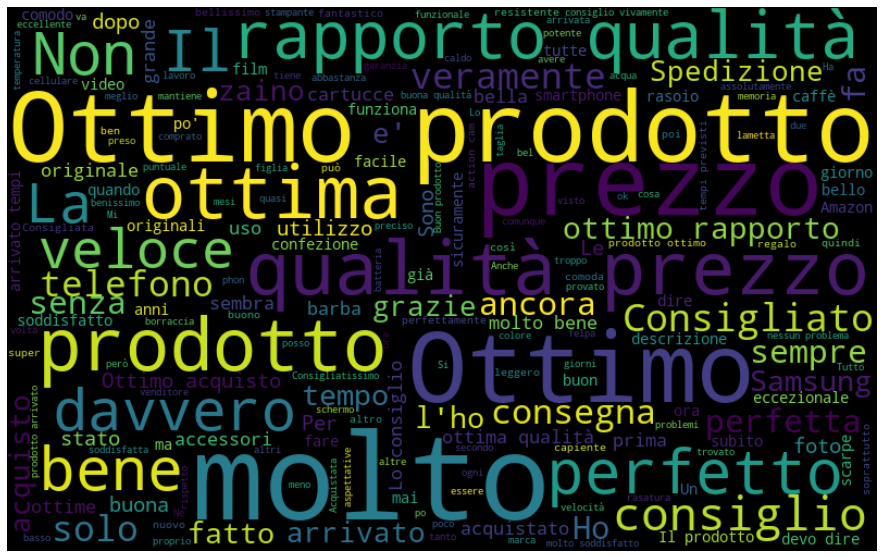

In [ ]:
#wordcloud recensioni 5 stelle, senza stop words


all_words = ' '.join([text for text in dftrain['text'][dftrain['labPol']==5]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

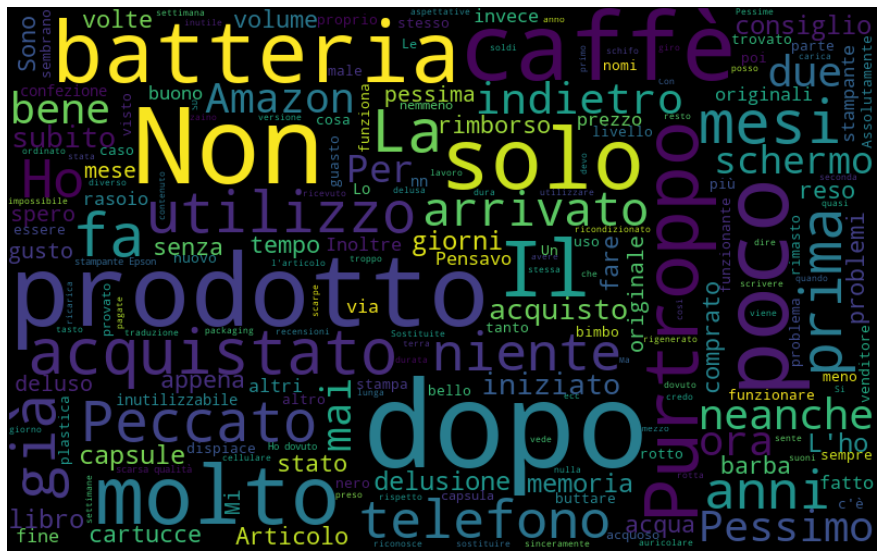

In [ ]:
all_words = ' '.join([text for text in dftrain['text'][dftrain['labPol']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()